git pull origin main


git add .

git commit -m "He añadido el menú principal"

git push origin main

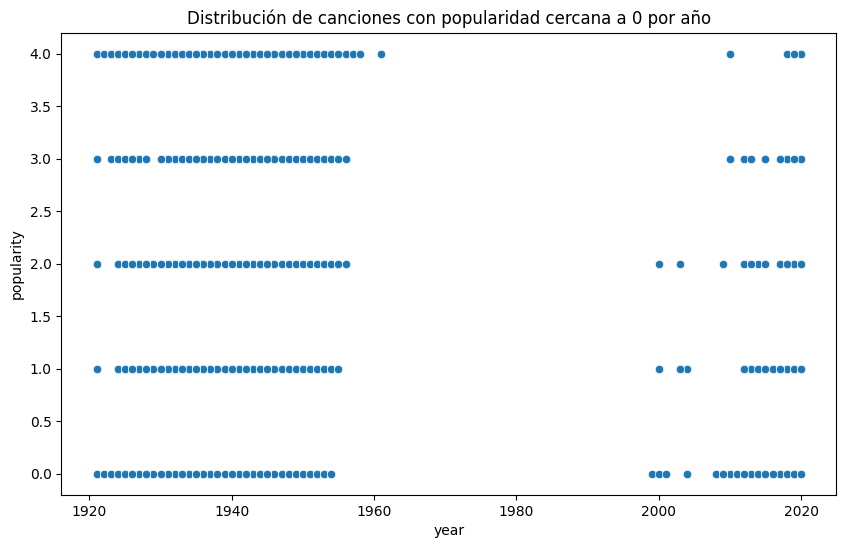

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv('archive/data.csv')

# Mostramos la distribución de canciones con popularidad cercana a 0 por año
plt.figure(figsize=(10,6))
sns.scatterplot(data=df[df['popularity'] < 5], x='year', y='popularity')
plt.title("Distribución de canciones con popularidad cercana a 0 por año")
plt.show()

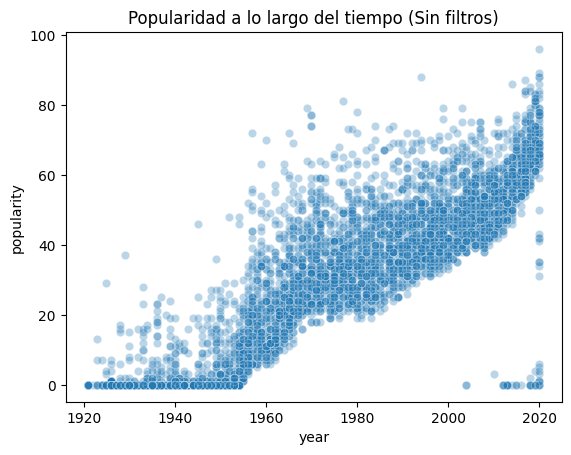

In [3]:
# Gráfico de TODOS los datos (una muestra aleatoria para no saturar)
sns.scatterplot(data=df.sample(5000), x='year', y='popularity', alpha=0.3)
plt.title("Popularidad a lo largo del tiempo (Sin filtros)")
plt.show()

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Asumimos que df es vuestro dataset completo cargado

# 1. ANÁLISIS DE "BASURA"
# Vamos a ver qué pinta tienen esas muestras sospechosas
muestras_cortas = df[df['duration_ms'] < 60000] # Menos de 1 min
muestras_habladas = df[df['speechiness'] > 0.9] # Casi todo voz
muestras_sin_tempo = df[df['tempo'] == 0]       # Error técnico

print(f"Canciones de menos de 1 minuto: {len(muestras_cortas)}")
print(f"Tracks que son solo voz (audiolibros/charlas): {len(muestras_habladas)}")
print(f"Tracks con tempo 0: {len(muestras_sin_tempo)}")

# 2. APLICACIÓN DE LA LIMPIEZA
# Definimos las condiciones de "Basura"
condicion_basura = (
    (df['duration_ms'] < 40000) |       # Menos de 40 seg (Intros/Ruido)
    (df['speechiness'] > 0.9) |         # Pura voz (No música)
    (df['tempo'] == 0)                  # Error de datos
)

# Nos quedamos con lo que NO es basura
# El símbolo ~ invierte la condición (significa "NO es basura")
df_limpio_final = df[~condicion_basura].copy()

print(f"\nDimensiones antes de limpiar basura: {df.shape}")
print(f"Dimensiones después de limpiar basura: {df_limpio_final.shape}")
print(f"Hemos eliminado {df.shape[0] - df_limpio_final.shape[0]} muestras de 'ruido'.")

# 3. VERIFICACIÓN
# Comprobamos que seguimos teniendo los ceros "buenos" (los antiguos)
ceros_antiguos = df_limpio_final[(df_limpio_final['year'] < 1950) & (df_limpio_final['popularity'] == 0)]
print(f"\nTodavía conservamos {len(ceros_antiguos)} canciones antiguas con popularidad 0.")

Canciones de menos de 1 minuto: 1615
Tracks que son solo voz (audiolibros/charlas): 4016
Tracks con tempo 0: 143

Dimensiones antes de limpiar basura: (170653, 19)
Dimensiones después de limpiar basura: (165988, 19)
Hemos eliminado 4665 muestras de 'ruido'.

Todavía conservamos 19073 canciones antiguas con popularidad 0.


--- DISTRIBUCIÓN FINAL DE CLASES ---
                  Canciones  % del Total
popularity_class                        
0                     60761        36.61
1                     40296        24.28
2                     40090        24.15
3                     20587        12.40
4                      4254         2.56


C:\Users\Adrián\AppData\Local\Temp\ipykernel_26464\2911287739.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=conteo.index, y=conteo.values, palette='magma')


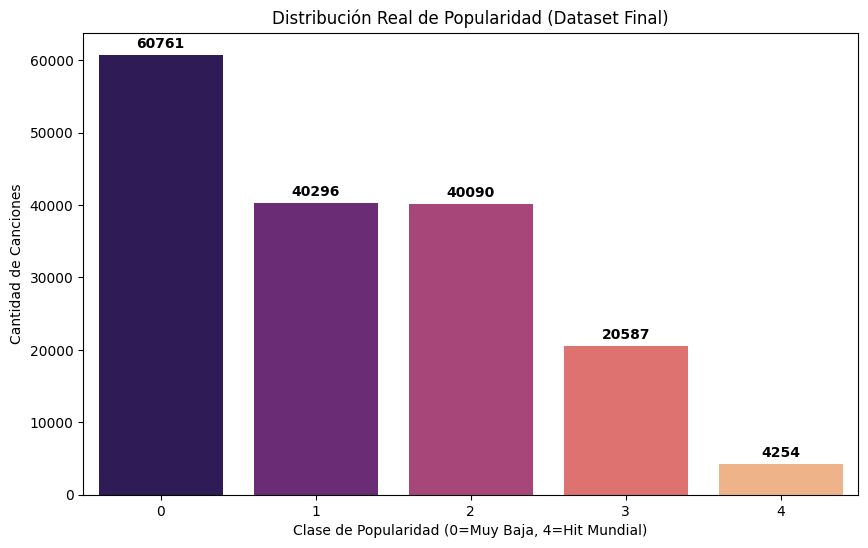

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Aplicamos los cortes (BINS) al dataset limpio completo
# Cortes: 0-25 (Muy Baja), 26-40 (Baja), 41-55 (Media), 56-70 (Alta), 71-100 (Hit)
bins_manual = [-1, 25, 40, 55, 70, 100]
labels_manual = [0, 1, 2, 3, 4]

# Asumimos que tu dataset actual se llama df_limpio_final (el de 165.988 filas)
df_limpio_final['popularity_class'] = pd.cut(df_limpio_final['popularity'], bins=bins_manual, labels=labels_manual)

# 2. Calculamos los porcentajes
conteo = df_limpio_final['popularity_class'].value_counts().sort_index()
porcentajes = (conteo / len(df_limpio_final) * 100).round(2)

print("--- DISTRIBUCIÓN FINAL DE CLASES ---")
print(pd.DataFrame({'Canciones': conteo, '% del Total': porcentajes}))

# 3. Visualización
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=conteo.index, y=conteo.values, palette='magma')

# Poner las etiquetas de cantidad encima de las barras
for i, v in enumerate(conteo.values):
    ax.text(i, v + 1000, str(v), ha='center', fontweight='bold')

plt.title('Distribución Real de Popularidad (Dataset Final)')
plt.xlabel('Clase de Popularidad (0=Muy Baja, 4=Hit Mundial)')
plt.ylabel('Cantidad de Canciones')
plt.show()